In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer

In [29]:
df = pd.read_csv('./datasets/train.csv')
df

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2      NaN       Reg          Lvl    AllPub     Inside        Gtl   
3      NaN       Reg          Lvl    AllPub     Inside        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0          Sawyer        RRAe        Norm      1Fam      2Story             6   
1         SawyerW        Norm        Norm      1Fam      2Story             7   
2           NAmes        Norm        Norm      1Fam      1Story             5   
3          Timber        Norm        Norm      1Fam      2Story             5   
4         SawyerW        Norm        Norm      1Fam      1.5Fin             6   
...           ...         ...         ...       ...         ...           ...   
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None 

In [30]:
pd.set_option('display.max_columns', 81)
# code taken from https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

In [31]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [32]:
# First goal to reduce the number of columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [34]:
nulls = df.isnull().sum()
nulls.sort_values(ascending=False).head(25)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
dtype: int64

In [35]:
drop_columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
df.drop(columns=drop_columns, inplace=True)
# dropped columns where ~50% of the column where null values

In [36]:
df['lot_frontage'].median()

68.0

In [37]:
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)  
# fix 'lot_frontage' column by setting nulls = mean of column

In [52]:
df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [53]:
df['garage_finish'].fillna('NA', inplace=True)

In [54]:
df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     114
Name: garage_finish, dtype: int64

In [55]:
df['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [56]:
df['garage_qual'].fillna('NA', inplace=True)

In [38]:
df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [39]:
# df['mas_vnr_type'].fillna('CBlock', inplace=True) 
# need to check and see if can fill with variable from dictionary not in data set

In [40]:
df[df['mas_vnr_area'].isnull()]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
86     539  531371050           20        RL          67.0     10083   Pave   
212    518  528458020           20        FV          90.0      7993   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
338   1800  528458150           60        FV         112.0     12217   Pave   
431   1455  907251090           60        RL          75.0      9473   Pave   
451   1120  528439010           20        RL          87.0     10037   Pave   
591   1841  533208040          120        FV          35.0      4274   Pave   
844   1840  533208030          120        FV          30.0      5330   Pave   
913   2230  909475070           20        RL          68.0     32668   Pave   
939   1123  528462040           20        FV          95.0     11639   Pave   
1025  1784  528435010           20        RL          85.0      9965   Pave   
1244   485  528275160           60        RL          68.0     12891   Pave   
1306  1752  528250010           80        RL          68.0     11950   Pave   
1430  1185  534104100           60        FV          68.0      7500   Pave   
1434  1128  528480160           60        FV          65.0      8125   Pave   
1606  1096  528290090           60        RL          68.0      7750   Pave   
1699  2261  916384070           20        RL          68.0      8298   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
1820  1728  528218010           60        RL          59.0     15810   Pave   
1941    56  528240070           60        RL          68.0      7851   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
22         IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
41         Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
86         Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
212        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
276        Reg          Lvl    AllPub     Inside        Gtl      Edwards   
338        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
431        Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
451        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
591        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
844        IR2          Lvl    AllPub     Inside        Gtl      Somerst   
913        IR1          Lvl    AllPub    CulDSac        Gtl      Crawfor   
939        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1025       Reg          Lvl    AllPub        FR2        Gtl      Somerst   
1244       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1306       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1430       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1434       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1606       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
1699       IR1          HLS    AllPub     Inside        Gtl       Timber   
1815       IR1          Lvl    AllPub    CulDSac        Gtl      Somerst   
1820       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1941       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
22          Norm        Norm      1Fam      2Story             8   
41          Norm        Norm      1Fam      1Story            10   
86          Norm        Norm      1Fam      1Story             7   
212         Norm        Norm      1Fam      1Story             7   
276         Norm        Norm      1Fam      1Story             6   
338         Norm        Norm     

In [41]:
df['mas_vnr_area'].describe()  # need to decide how to clean

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

<AxesSubplot:>

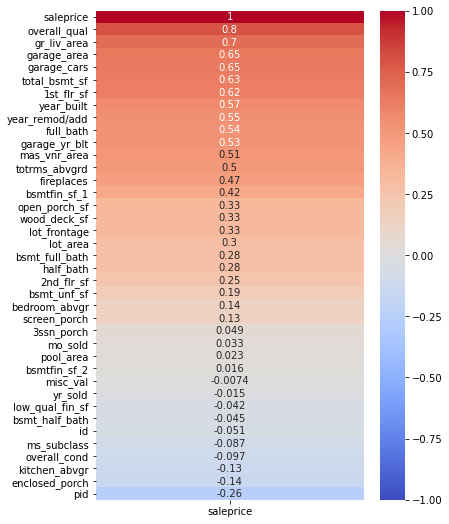

In [42]:
plt.figure(figsize=(6,9))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

In [43]:
df.drop(columns=['pid'], inplace=True)  # little to no correlation with 'SalesPrice' so column not needed

In [44]:
nulls = df.isnull().sum()
nulls.sort_values(ascending=False).head(24)

garage_yr_blt     114
garage_finish     114
garage_qual       114
garage_cond       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmt_cond          55
bsmt_qual          55
bsmtfin_type_1     55
mas_vnr_area       22
mas_vnr_type       22
bsmt_half_bath      2
bsmt_full_bath      2
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
garage_area         1
garage_cars         1
total_bsmt_sf       1
full_bath           0
gr_liv_area         0
half_bath           0
bedroom_abvgr       0
dtype: int64

In [45]:
df['porch_sqft'] = df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']

In [46]:
# df.drop(columns=['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], inplace=True)
# not sure about dropping these anymore - need to ask

In [47]:
# Combined all types of porches sq_ft into one category and dropped original categories

In [48]:
df['porch_sqft'].corr(df['saleprice'])

0.21897302327965107

In [49]:
plt.figure(figsize=(6,9))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

<AxesSubplot:>

In [50]:
df.shape

(2051, 76)

In [51]:
df.to_csv('./datasets/clean_train.csv', index=False)